In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score , mean_absolute_error, mean_squared_error
#regression models
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from xgboost import XGBRegressor

In [3]:
df=pd.read_csv("/content/weatherHistory.csv")
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [5]:
df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [6]:
df.duplicated().sum()

24

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.isnull().sum()

,0
Formatted Date,0
Summary,0
Precip Type,517
Temperature (C),0
Apparent Temperature (C),0
Humidity,0
Wind Speed (km/h),0
Wind Bearing (degrees),0
Visibility (km),0
Loud Cover,0


In [9]:
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], utc=True)

In [10]:
df['Year'] = df['Formatted Date'].dt.year
df['Month'] = df['Formatted Date'].dt.month
df['Day'] = df['Formatted Date'].dt.day
df['Hour'] = df['Formatted Date'].dt.hour
df['Minute'] = df['Formatted Date'].dt.minute
df['Second'] = df['Formatted Date'].dt.second

In [11]:
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Year,Month,Day,Hour,Minute,Second
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,2006,3,31,22,0,0
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,2006,3,31,23,0,0
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,2006,4,1,0,0,0
3,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,2006,4,1,1,0,0
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,2006,4,1,2,0,0


In [12]:
numerical_df = df.select_dtypes(include=['number'])

In [13]:
numerical_df

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Year,Month,Day,Hour,Minute,Second
0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,2006,3,31,22,0,0
1,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,2006,3,31,23,0,0
2,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,2006,4,1,0,0,0
3,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,2006,4,1,1,0,0
4,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,2006,4,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96448,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,2016,9,9,17,0,0
96449,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,2016,9,9,18,0,0
96450,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,2016,9,9,19,0,0
96451,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,2016,9,9,20,0,0


In [14]:
numerical_df['Minute'].value_counts()

,count
Minute,
0,96429


In [15]:
numerical_df['Second'].value_counts()

,count
Second,
0,96429


In [16]:
numerical_df['Loud Cover'].value_counts()

,count
Loud Cover,
0.0,96429


 'Loud Cover','Minute','Second' column, It has all values as 0 , unuseful

In [17]:
numerical_df.drop(['Minute','Second','Loud Cover'],axis=1,inplace=True)

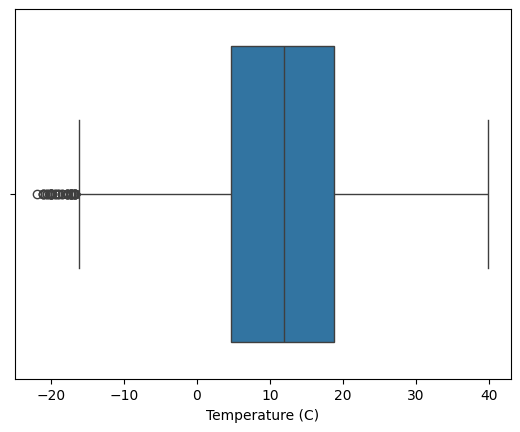

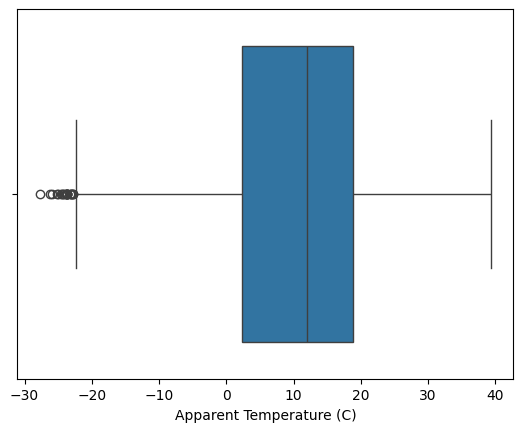

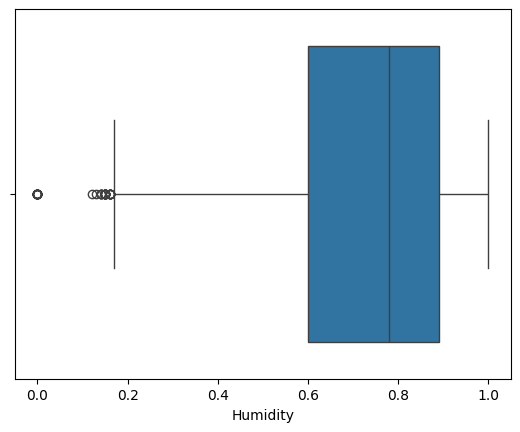

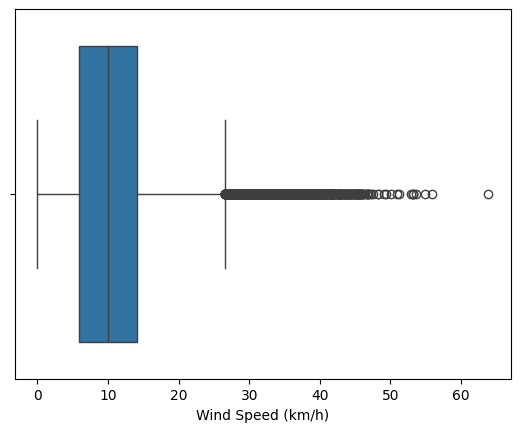

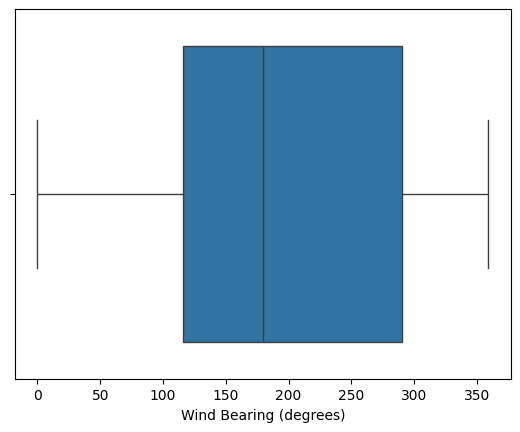

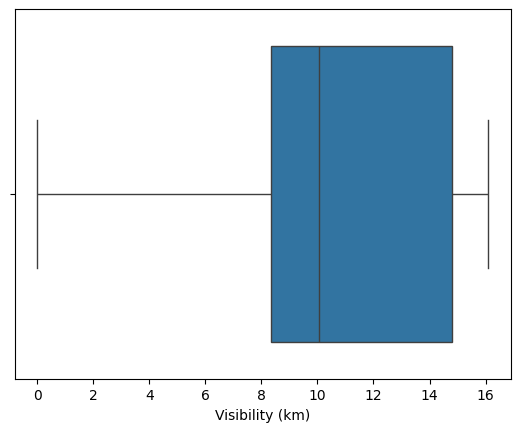

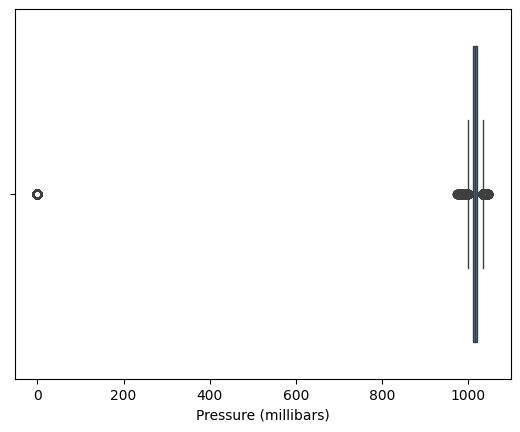

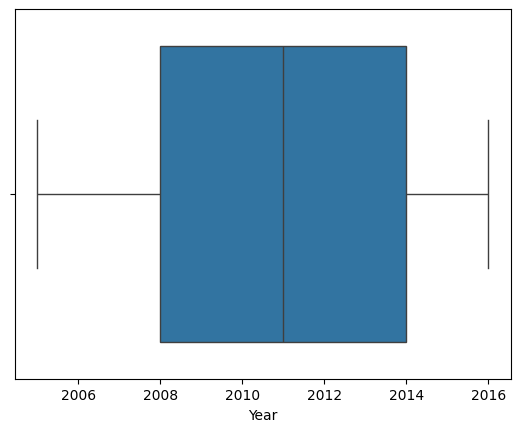

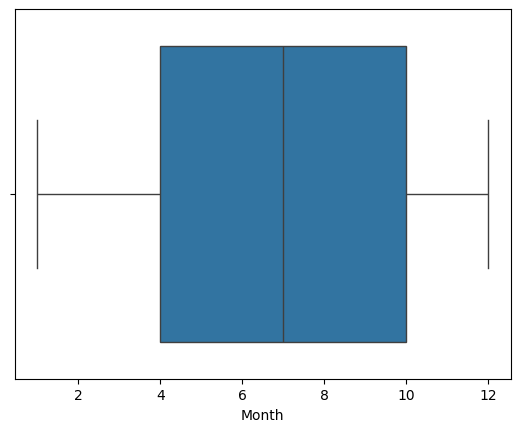

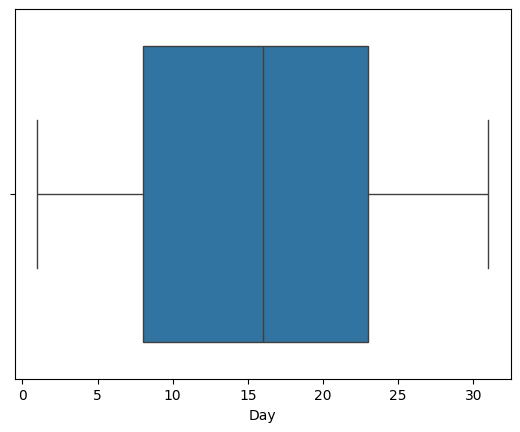

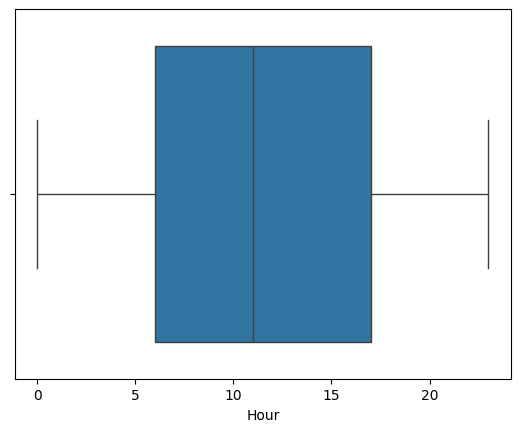

In [18]:
for i in numerical_df.columns:
  sns.boxplot(x=numerical_df[i])
  plt.show()

In [19]:
columns=['Temperature (C)','Apparent Temperature (C)','Humidity','Wind Speed (km/h)','Pressure (millibars)']
for column in columns:
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = numerical_df[column].quantile(0.25)
    Q3 = numerical_df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define the bounds for identifying outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter the DataFrame to remove outliers
    numerical_df = numerical_df[(numerical_df[column] >= lower_bound) & (numerical_df[column] <= upper_bound)]


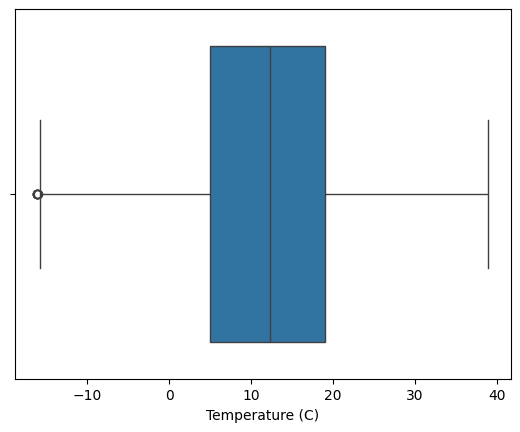

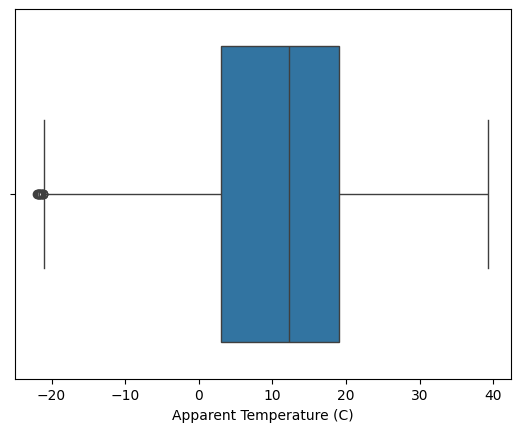

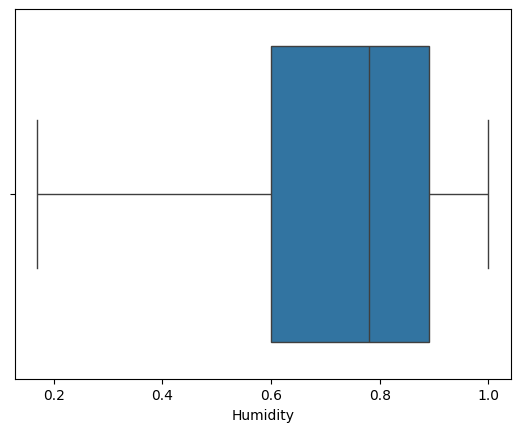

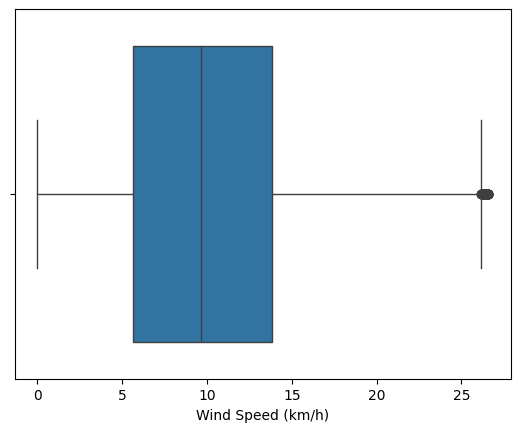

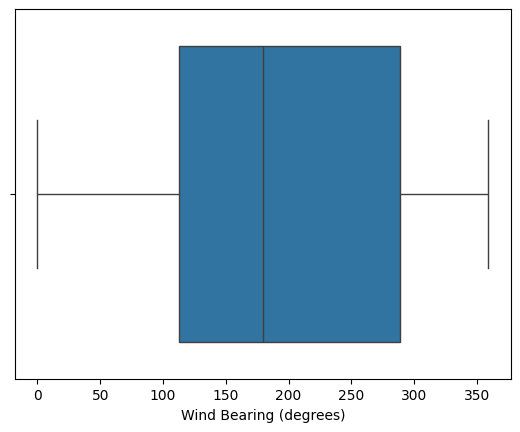

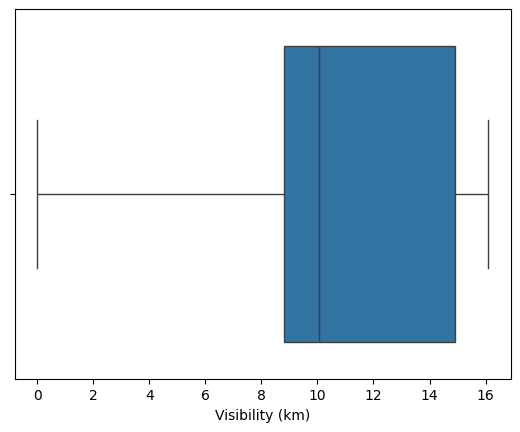

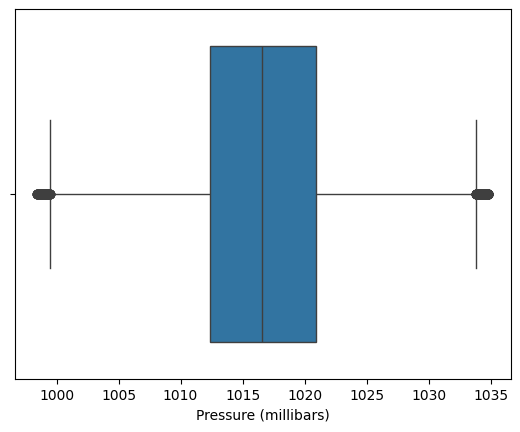

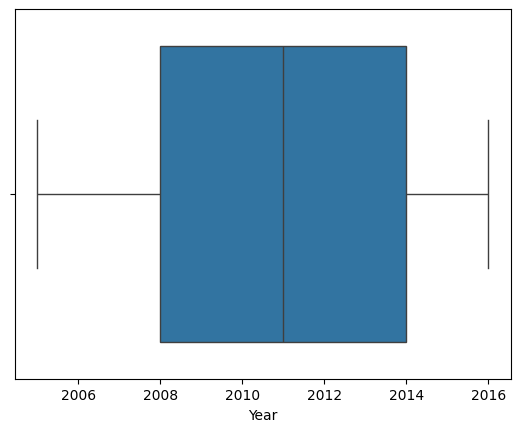

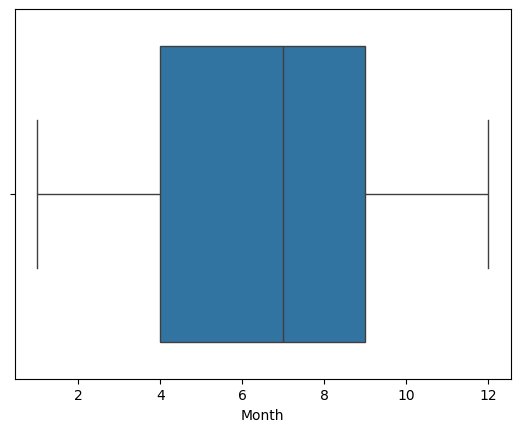

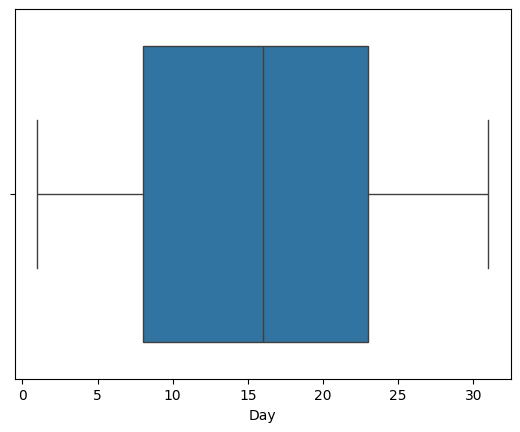

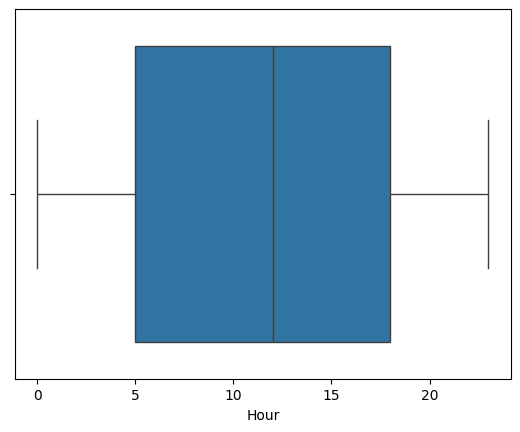

In [20]:
for i in numerical_df.columns:
  sns.boxplot(x=numerical_df[i])
  plt.show()

In [22]:
x=numerical_df.drop('Temperature (C)',axis=1)
y=numerical_df['Temperature (C)']

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [33]:
def evaluate_model(actual, predicted):
    r2 = r2_score(actual, predicted)
    MAE= mean_absolute_error(actual , predicted)
    MSE= mean_squared_error(actual , predicted )
    RMSE= np.sqrt(MSE)
    return r2, MAE, MSE ,RMSE

In [34]:
models = {
    'LinearRegression' : LinearRegression(),
    'KNeighborsRegressor' : KNeighborsRegressor(),
    'DecisionTreeRegressor' : DecisionTreeRegressor(),
    'RandomForestRegressor' : RandomForestRegressor(),
    'AdaBoostRegressor' : AdaBoostRegressor(),
    'XGBRegressor' : XGBRegressor()
}

**LinearRegression**
Model Training Performance : 
R2_Score = 0.9912554346695283 
Model Testing Performance : 
R2_Score = 0.9913353249868525, mean_absolute_error = 0.695334379665435, mean_squared_error = 0.7700701305354877, root_mean_squared_error = 0.877536398410623
**KNeighborsRegressor**
Model Training Performance : 
R2_Score = 0.9847690743878978 
Model Testing Performance : 
R2_Score = 0.977182428759253, mean_absolute_error = 1.0959820527201345, mean_squared_error = 2.027904109179286, root_mean_squared_error = 1.4240449814452092
**DecisionTreeRegressor**
Model Training Performance : 
R2_Score = 1.0 
Model Testing Performance : 
R2_Score = 0.9999384381487696, mean_absolute_error = 0.022450302237180877, mean_squared_error = 0.005471289199088786, root_mean_squared_error = 0.0739681634156803
**RandomForestRegressor**
Model Training Performance : 
R2_Score = 0.999996246569891 
Model Testing Performance : 
R2_Score = 0.9999743070518494, mean_absolute_error = 0.012205203464828939, mean_sq

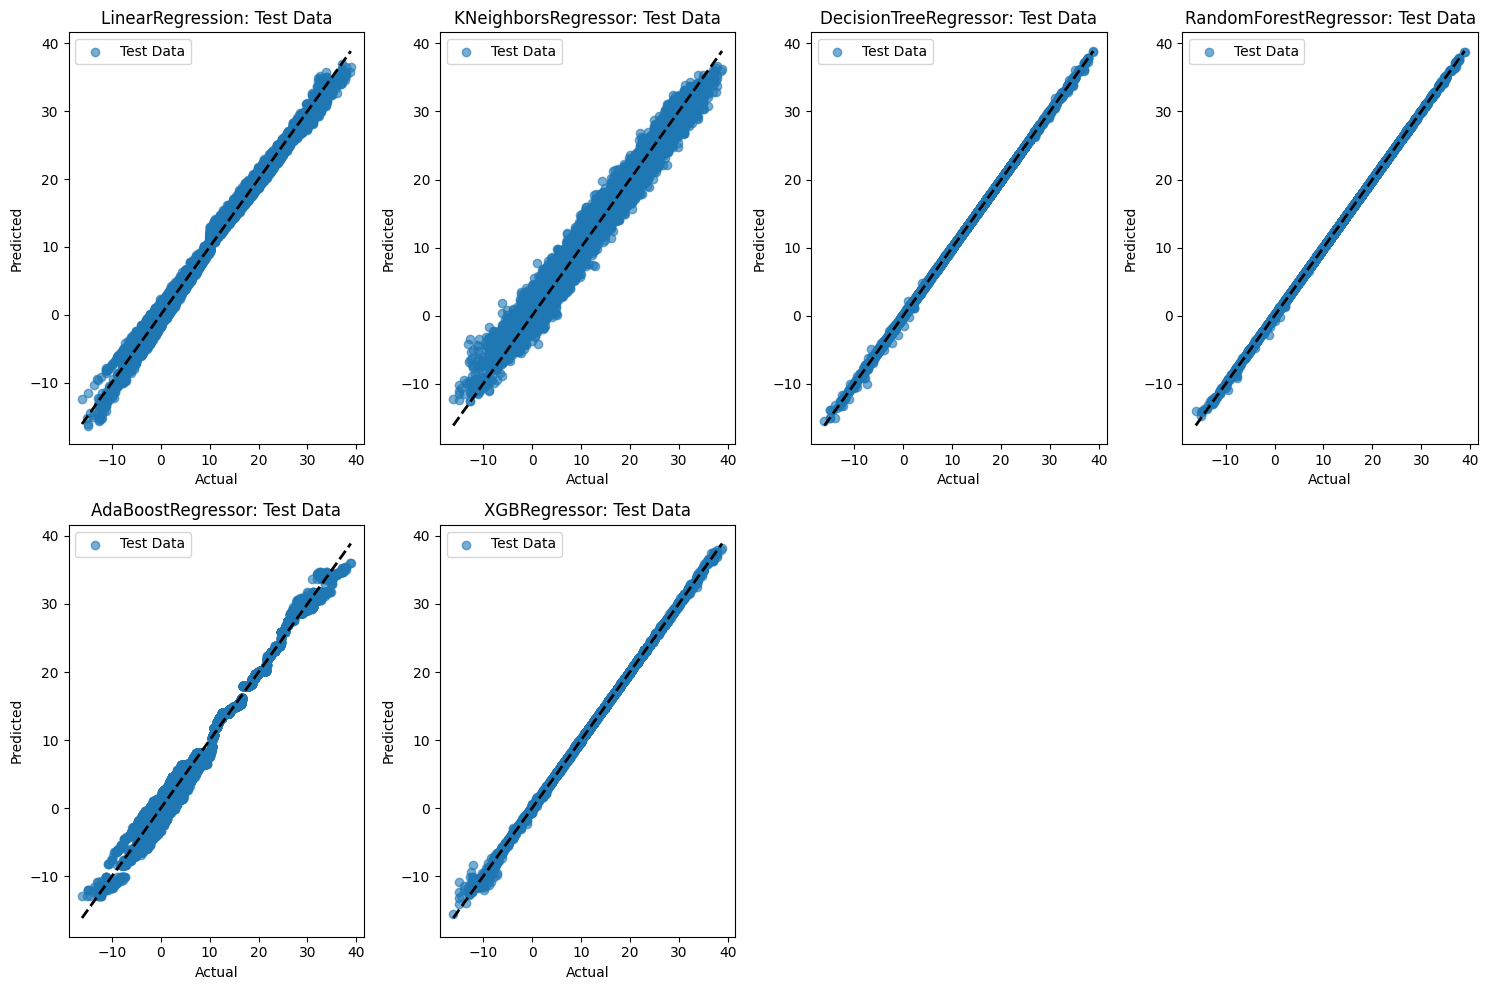

In [37]:
models_list = [] #list
predictions = {} #dictionary

for model_name, model in models.items():
    # Fit the model
    model.fit(x_train, y_train)

    # Make predictions
    test_pred = model.predict(x_test)
    train_pred = model.predict(x_train)

    # Evaluate the model
    test_r2_score, test_MAE, test_MSE, test_RMSE = evaluate_model(y_test, test_pred)
    train_r2_score,_,_,_ = evaluate_model(y_train, train_pred)

    print(f"**{model_name}**")
    models_list.append(model_name)

    print("Model Training Performance : ")
    print(f"R2_Score = {train_r2_score} ")
    print("Model Testing Performance : ")
    print(f"R2_Score = {test_r2_score}, mean_absolute_error = {test_MAE}, mean_squared_error = {test_MSE}, root_mean_squared_error = {test_RMSE}")

    # Store predictions
    predictions[model_name] = test_pred

# Plotting predictions vs actual for each model
plt.figure(figsize=(15, 10))
for i, model_name in enumerate(models_list):
    test_pred = predictions[model_name]
    plt.subplot(2, len(models)//2 + 1, i+1)
    plt.scatter(y_test, test_pred, alpha=0.6, label='Test Data')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'{model_name}: Test Data')
    plt.legend()

plt.tight_layout()
plt.show()


Random forest regressor , Decision tree seems to be the best


1. What type of machine learning problem is this?

---

Supervised machine learning ( regression )

2. How do the features relate to each other and to the
weather conditions?

3. What are the steps involved in preprocessing the
dataset for machine learning?

---
in this dataset
- separate numerical columns
- check duplicates and null values
- handle outliers
- handle date column


4. How do we select the best model for our dataset?

---
We select the best model by training multiple models and comparing their performance using metrics

5. What metrics should we use to evaluate the
performance of our weather prediction model?

---
r2 score for training and testing ,mean absolute error ,  mean square error , root mean square error for each model